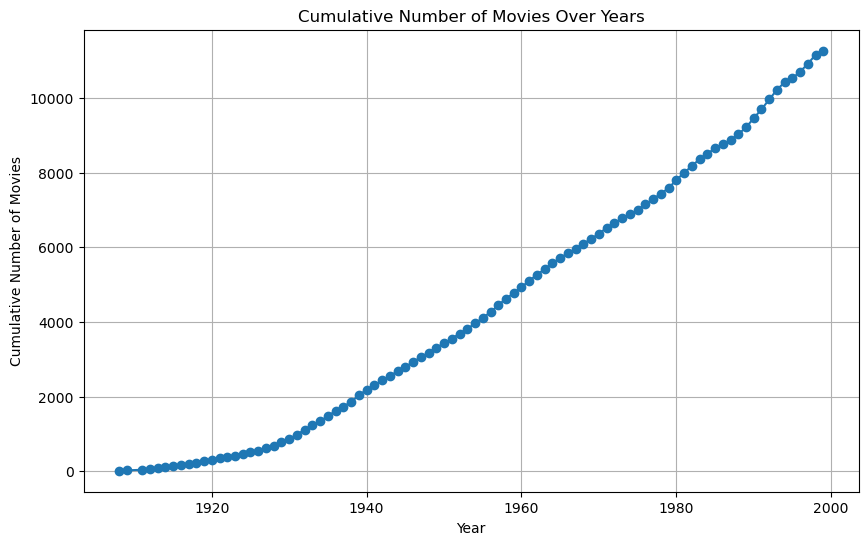

In [6]:
import matplotlib.pyplot as plt

# Read data from file
data = []
with open('numMoviesPerYear.txt', 'r') as f:
    for line in f:
        if line.strip():  # Ignore empty lines
            num_movies, year = map(int, line.split())
            data.append((year, num_movies))

# Sort data by year
data.sort(key=lambda x: x[0])

# Calculate cumulative sum of number of movies
cumulative_movies = [0]
for year, num_movies in data:
    cumulative_movies.append(cumulative_movies[-1] + num_movies)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot([x[0] for x in data], cumulative_movies[1:], marker='o', linestyle='-')
plt.title('Cumulative Number of Movies Over Years')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Movies')
plt.grid(True)
plt.show()


Error: Unable to parse: Lodge
Error: Unable to parse: P
Error: Unable to parse: Dwan
Error: Unable to parse: P
Error: Unable to parse: P
Error: Unable to parse: P
Error: Unable to parse: Lady
Error: Unable to parse: P
Error: Unable to parse: P
Error: Unable to parse: Exposur
Error: Unable to parse: 19xx
Error: Unable to parse: Tita
Error: Unable to parse: P
Error: Unable to parse: 199x
Error: Unable to parse: Affai
Error: Unable to parse: Bur
Error: Unable to parse: Worl
Error: Unable to parse: FT10
Error: Unable to parse: Corma
Error: Unable to parse: Schl
Error: Unable to parse: S
Error: Unable to parse: Do
Error: Unable to parse: 199x
Error: Unable to parse: Wh
Error: Unable to parse: Haywort
Error: Unable to parse: Coleman
Error: Unable to parse: I
Error: Unable to parse: Milos
Error: Unable to parse: 199x
Error: Unable to parse: Sad
Error: Unable to parse: Hoo
Error: Unable to parse: 1969x
Error: Unable to parse: P
Error: Unable to parse: 19xx
Error: Unable to parse: Floy
Error: U

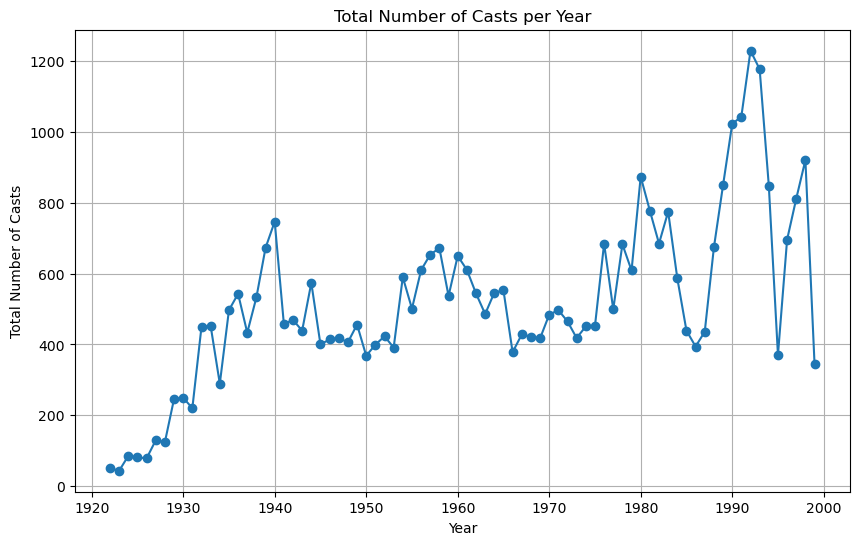

In [9]:
import matplotlib.pyplot as plt

# Read data from movie_cast.txt
movie_cast_data = {}
with open('movie_cast_size.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            parts = line.split(maxsplit=1)
            if len(parts) >= 2:
                cast_count = parts[0]
                movie_name = parts[1:][0]
                movie_cast_data[movie_name] = int(cast_count)

# Read data from movie_release.txt and extract year
movie_release_data = {}
with open('movieReleaseDate.txt', 'r') as f:
    for line in f:
        line = line.strip()
        if line:
            parts = line.rsplit(maxsplit=1)
            if len(parts) >= 2:
                movie_name = ' '.join(parts[:-1])  # Join all words except the last one as movie name
                year = parts[-1]  # Last word is the year
                try:
                    year = int(year)
                    if year >= 1922:  # Only consider movies from 1922 and later
                        movie_release_data[movie_name] = year
                except ValueError:
                    print("Error: Unable to parse:", year)

# Match movie names and calculate total cast per year
casts_per_year = {}
for movie_name, cast_count in movie_cast_data.items():
    if movie_name in movie_release_data:
        year = movie_release_data[movie_name]
        if year in casts_per_year:
            casts_per_year[year] += cast_count
        else:
            casts_per_year[year] = cast_count

# Sort the dictionary by year
sorted_casts_per_year = dict(sorted(casts_per_year.items()))

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(list(sorted_casts_per_year.keys()), list(sorted_casts_per_year.values()), marker='o', linestyle='-')
plt.title('Total Number of Casts per Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Casts')
plt.grid(True)
plt.show()
